In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import datasets, transforms, models
from torch.autograd import Variable
from zipfile import ZipFile
import os
from os import path
import shutil

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
url='/content/drive/MyDrive/Softcom/Assignment 2/'

In [5]:
dataset_A = url + 'Dataset A.zip'
with ZipFile(dataset_A, 'r') as zip:
  zip.extractall()

In [9]:
import pandas as pd
data_labels = pd.read_csv('/content/drive/MyDrive/Softcom/Assignment 2/' + 'training-a.csv', usecols = ['filename', 'digit'])

In [10]:
print(data_labels.shape)
data_labels.head()

(19702, 2)


,filename,digit
0,a00000.png,5
1,a00001.png,3
2,a00002.png,1
3,a00003.png,7
4,a00004.png,0


In [11]:
PATH = '/content/'

In [12]:
TRAIN_PATH = url + 'Train'
os.mkdir(TRAIN_PATH)

def processImages(folder_name):
  src = PATH + folder_name + '/'
  dir_folders = os.listdir(src)
  for dir_name in dir_folders:
    file_name = os.path.join(src, dir_name)
    if os.path.isfile(file_name):
      shutil.copy(file_name, TRAIN_PATH) 

processImages('training-a')

In [13]:
class Dataset(Dataset):
    def __init__(self, df, root, transform=None):
        self.data = df
        self.root = root
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        item = self.data.iloc[index]
        
        path = self.root + "/" + item[0]
        image = Image.open(path).convert('L')
        label = item[1]
        
        if self.transform is not None:
            image = self.transform(image)
            
        return image, label

In [14]:
mean = [0.5,]
std = [0.5, ]

train_transform = transforms.Compose([
    transforms.Resize(28),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

test_transform = transforms.Compose([
        transforms.Resize(28),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
])

train_data  = Dataset(data_labels, TRAIN_PATH, train_transform)
test_data = Dataset(data_labels, TRAIN_PATH, test_transform)

print("Trainig Samples: ", len(train_data))

Trainig Samples:  19702


# **Experminent1**

In [15]:
#Batch Parameters
batch_size = 20
num_iters = 20000
input_dim = 28*28
num_hidden = 200
output_dim = 10

learning_rate = 0.01

num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

20


In [16]:
test_size = 0.2
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
train_idx, test_idx = indices[split:], indices[:split]

train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))

Train dataloader:789
Test dataloader:197


In [17]:
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()

       #First Hidden Layer
        self.linear_1 = nn.Linear(input_size, num_hidden)
        self.relu_1 = nn.ReLU()

        #2nd Hidden Layer
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        self.relu_2 = nn.ReLU()

         #3rd Hidden Layer
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        self.relu_3 = nn.ReLU()

         #4th Hidden Layer
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        self.relu_4 = nn.ReLU()

         #5th Hidden Layer
        self.linear_5= nn.Linear(num_hidden, num_hidden)
        self.relu_5= nn.ReLU()
        
        #6th Hidden Layer
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        self.relu_6 = nn.ReLU()
 
        self.linear_out = nn.Linear(num_hidden, num_classes)
 
    def forward(self, x):
        out  = self.linear_1(x)
        out = self.relu_1(out)
        
        out  = self.linear_2(out)
        out = self.relu_2(out)
 
        out  = self.linear_3(out)
        out = self.relu_3(out)
 
        out  = self.linear_4(out)
        out = self.relu_4(out)
 
        out  = self.linear_5(out)
        out = self.relu_5(out)
 
        out  = self.linear_6(out)
        out = self.relu_6(out)
        
        probas  = self.linear_out(out)
        return probas

In [18]:
model = DeepNeuralNetworkModel(input_size = input_dim, num_classes = output_dim, num_hidden = num_hidden)

model.to(device)

DeepNeuralNetworkModel(
  (linear_1): Linear(in_features=784, out_features=200, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=200, out_features=200, bias=True)
  (relu_2): ReLU()
  (linear_3): Linear(in_features=200, out_features=200, bias=True)
  (relu_3): ReLU()
  (linear_4): Linear(in_features=200, out_features=200, bias=True)
  (relu_4): ReLU()
  (linear_5): Linear(in_features=200, out_features=200, bias=True)
  (relu_5): ReLU()
  (linear_6): Linear(in_features=200, out_features=200, bias=True)
  (relu_6): ReLU()
  (linear_out): Linear(in_features=200, out_features=10, bias=True)
)

In [19]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [20]:
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    print('Epoch: ', epoch + 1)
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(images) 

        loss = criterion(outputs, labels)

        loss.backward()

        optimizer.step()

        iter += 1

        if iter % 500 == 0:        
            correct = 0
            total = 0
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                outputs = model(images)

                _, predicted = torch.max(outputs, 1)

                total += labels.size(0)

                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Epoch:  1
Iteration: 500. Loss: 2.301544666290283. Accuracy: 10.203045685279188
Epoch:  2
Iteration: 1000. Loss: 2.3025949001312256. Accuracy: 9.34010152284264
Iteration: 1500. Loss: 2.304614305496216. Accuracy: 9.34010152284264
Epoch:  3
Iteration: 2000. Loss: 2.3043835163116455. Accuracy: 9.34010152284264
Epoch:  4
Iteration: 2500. Loss: 2.305349826812744. Accuracy: 13.223350253807107
Iteration: 3000. Loss: 2.302974224090576. Accuracy: 9.365482233502538
Epoch:  5
Iteration: 3500. Loss: 2.3025946617126465. Accuracy: 9.974619289340101
Epoch:  6
Iteration: 4000. Loss: 2.3035120964050293. Accuracy: 10.304568527918782
Iteration: 4500. Loss: 2.302872657775879. Accuracy: 9.898477157360405
Epoch:  7
Iteration: 5000. Loss: 2.3051867485046387. Accuracy: 9.34010152284264
Iteration: 5500. Loss: 2.298745632171631. Accuracy: 9.34010152284264
Epoch:  8
Iteration: 6000. Loss: 2.3069019317626953. Accuracy: 9.34010152284264
Epoch:  9
Iteration: 6500. Loss: 2.3008270263671875. Accuracy: 13.223350253807

In [21]:
torch.save(model.state_dict(), '/content/drive/MyDrive/Softcom/Assignment 2/model_base.pkl')


[2.301544666290283, 2.3025949001312256, 2.304614305496216, 2.3043835163116455, 2.305349826812744, 2.302974224090576, 2.3025946617126465, 2.3035120964050293, 2.302872657775879, 2.3051867485046387, 2.298745632171631, 2.3069019317626953, 2.3008270263671875, 2.301605463027954, 2.289323329925537, 2.304929256439209, 2.2951483726501465, 2.279618978500366, 2.297274589538574, 2.277194023132324, 2.2932605743408203, 2.2413623332977295, 2.228012800216675, 2.173809289932251, 2.2640480995178223, 2.2023792266845703, 2.54711651802063, 2.080751895904541, 1.9513943195343018, 2.1044154167175293, 2.1321892738342285]


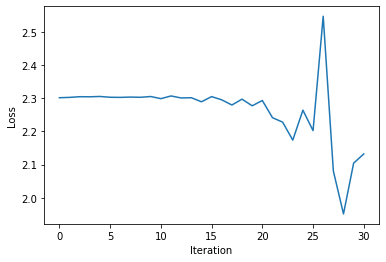

In [22]:
print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.show()

# **Experiment 2**

In [23]:
#Batch Parameters
batch_size = 300
num_iters = 25000
input_dim = 28*28
num_hidden = 250
output_dim = 10

learning_rate = 0.02

num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

380


In [24]:
test_size = 0.2
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
train_idx, test_idx = indices[split:], indices[:split]

train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))

Train dataloader:53
Test dataloader:14


In [25]:
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()

       #First Hidden Layer
        self.linear_1 = nn.Linear(input_size, num_hidden)
        self.relu_1 = nn.ReLU()

        #2nd Hidden Layer
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        self.relu_2 = nn.ReLU()

         #3rd Hidden Layer
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        self.relu_3 = nn.Softmax(dim=0)

         #4th Hidden Layer
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        self.relu_4 = nn.ReLU()

         #5th Hidden Layer
        self.linear_5= nn.Linear(num_hidden, num_hidden)
        self.relu_5= nn.ReLU()
        
        #6th Hidden Layer
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        self.relu_6 = nn.ReLU()


  
 
        self.linear_out = nn.Linear(num_hidden, num_classes)
 
    def forward(self, x):
        out  = self.linear_1(x)
        out = self.relu_1(out)
        
        out  = self.linear_2(out)
        out = self.relu_2(out)
 
        out  = self.linear_3(out)
        out = self.relu_3(out)
 
        out  = self.linear_4(out)
        out = self.relu_4(out)
 
        out  = self.linear_5(out)
        out = self.relu_5(out)
 
        out  = self.linear_6(out)
        out = self.relu_6(out)

        
        
        probas  = self.linear_out(out)
        return probas

In [26]:
model = DeepNeuralNetworkModel(input_size = input_dim, num_classes = output_dim, num_hidden = num_hidden)

model.to(device)

DeepNeuralNetworkModel(
  (linear_1): Linear(in_features=784, out_features=250, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=250, out_features=250, bias=True)
  (relu_2): ReLU()
  (linear_3): Linear(in_features=250, out_features=250, bias=True)
  (relu_3): Softmax(dim=0)
  (linear_4): Linear(in_features=250, out_features=250, bias=True)
  (relu_4): ReLU()
  (linear_5): Linear(in_features=250, out_features=250, bias=True)
  (relu_5): ReLU()
  (linear_6): Linear(in_features=250, out_features=250, bias=True)
  (relu_6): ReLU()
  (linear_out): Linear(in_features=250, out_features=10, bias=True)
)

In [27]:
criterion = nn.CrossEntropyLoss()
#optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [ ]:
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    print('Epoch: ', epoch + 1)
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(images) 

        loss = criterion(outputs, labels)

        loss.backward()

        optimizer.step()

        iter += 1

        if iter % 500 == 0:        
            correct = 0
            total = 0
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                outputs = model(images)

                _, predicted = torch.max(outputs, 1)

                total += labels.size(0)

                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10
Iteration: 500. Loss: 0.8263171911239624. Accuracy: 64.03553299492386
Epoch:  11
Epoch:  12
Epoch:  13
Epoch:  14
Epoch:  15
Epoch:  16
Epoch:  17
Epoch:  18
Epoch:  19
Iteration: 1000. Loss: 0.5762916803359985. Accuracy: 74.94923857868021
Epoch:  20
Epoch:  21
Epoch:  22
Epoch:  23
Epoch:  24
Epoch:  25
Epoch:  26
Epoch:  27
Epoch:  28
Epoch:  29
Iteration: 1500. Loss: 0.5222821831703186. Accuracy: 77.41116751269035
Epoch:  30
Epoch:  31
Epoch:  32
Epoch:  33
Epoch:  34
Epoch:  35
Epoch:  36
Epoch:  37
Epoch:  38
Iteration: 2000. Loss: 0.4808143079280853. Accuracy: 77.71573604060913
Epoch:  39
Epoch:  40
Epoch:  41
Epoch:  42
Epoch:  43
Epoch:  44
Epoch:  45
Epoch:  46
Epoch:  47
Epoch:  48
Iteration: 2500. Loss: 0.4331889748573303. Accuracy: 77.41116751269035
Epoch:  49
Epoch:  50
Epoch:  51
Epoch:  52
Epoch:  53
Epoch:  54
Epoch:  55
Epoch:  56
Epoch:  57
Iteration: 3000. Loss: 0.407

In [ ]:
torch.save(model.state_dict(), '/content/drive/MyDrive/Softcom/Assignment 2/model_base1.pkl')

# **Experiment 3**

In [10]:
from torch.utils.data import Dataset, DataLoader  

In [6]:
!unzip "/content/drive/MyDrive/Softcom/Assignment 2/Dataset_2.zip"

Archive:  /content/drive/MyDrive/Softcom/Assignment 2/Dataset_2.zip
   creating: Dataset_2/
  inflating: Dataset_2/t10k-images-idx3-ubyte  
  inflating: Dataset_2/t10k-labels-idx1-ubyte  
  inflating: Dataset_2/train-images-idx3-ubyte  
  inflating: Dataset_2/train-labels-idx1-ubyte  
  inflating: Dataset_2/verification_test.csv  
  inflating: Dataset_2/verification_train.csv  


In [7]:
train_csv2  = pd.read_csv('/content/Dataset_2/verification_train.csv')
test_csv2 = pd.read_csv('/content/Dataset_2/verification_test.csv')

In [8]:
import numpy as np
class second_Dataset(Dataset):
    """User defined class to build a datset using Pytorch class Dataset."""
    
    def __init__(self, data, transform = None):
        """Method to initilaize variables.""" 
        self.data_MNIST = list(data.values)
        self.transform = transform
        
        label = []
        image = []
        
        for i in self.data_MNIST:
             # first column is of labels.
            label.append(i[0])
            image.append(i[1:])
        self.labels = np.asarray(label)
        self.images = np.asarray(image).reshape(-1, 28, 28, 1).astype('float32')

    def __getitem__(self, index):
        label = self.labels[index]
        image = self.images[index]
        
        if self.transform is not None:
            image = self.transform(image)

        return image, label

    def __len__(self):
        return len(self.images)

In [11]:
train_set = second_Dataset(train_csv2, transform=transforms.Compose([transforms.ToTensor()]))
test_set = second_Dataset(test_csv2, transform=transforms.Compose([transforms.ToTensor()]))

train_loader = DataLoader(train_set, batch_size=100)
test_loader = DataLoader(train_set, batch_size=100)

Experiment 1

In [12]:
print(len(train_set))
print(len(test_set))

60000
10000


In [13]:
# Hyperparameters

batch_size = 20
num_iters = 20000
input_dim = 28*28
num_hidden = 200 
output_dim = 10

learning_rate = 0.01 

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")




'''
MAKING DATASET ITERABLE
'''
num_epochs = num_iters / (len(train_set) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_set, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test_set, 
                                          batch_size=batch_size, 
                                          shuffle=False)





class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_3 = nn.ReLU()

        ### 4th hidden layer: 100 --> 100
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_4 = nn.ReLU()

        ### 5th hidden layer: 100 --> 100
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_5 = nn.ReLU()

        ### 6th hidden layer: 100 --> 100
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_6 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)
        
        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 1st hidden layer
        out = self.relu_3(out)
        
        ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_4(out)

        ### 5th hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 1st hidden layer
        out = self.relu_5(out)
        
        ### 6th hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_6(out)
     
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas


# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)
# To enable GPU
model.to(device)

# INSTANTIATE LOSS & OPTIMIZER CLASS

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
iteration_loss= []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 1.0431827306747437. Accuracy: 70.51
Iteration: 1000. Loss: 0.18221113085746765. Accuracy: 80.22
Iteration: 1500. Loss: 1.1465885639190674. Accuracy: 79.83
Iteration: 2000. Loss: 0.47877582907676697. Accuracy: 84.35
Iteration: 2500. Loss: 0.4100721776485443. Accuracy: 83.22
Iteration: 3000. Loss: 0.2814702093601227. Accuracy: 82.7
Iteration: 3500. Loss: 0.3876155912876129. Accuracy: 84.27
Iteration: 4000. Loss: 0.16571012139320374. Accuracy: 85.36
Iteration: 4500. Loss: 0.861181914806366. Accuracy: 82.66
Iteration: 5000. Loss: 0.31141677498817444. Accuracy: 85.74
Iteration: 5500. Loss: 0.4319884181022644. Accuracy: 85.8
Iteration: 6000. Loss: 0.40539485216140747. Accuracy: 86.68
Iteration: 6500. Loss: 0.2964221239089966. Accuracy: 85.63
Iteration: 7000. Loss: 0.09642702341079712. Accuracy: 86.52
Iteration: 7500. Loss: 0.20680728554725647. Accuracy: 86.66
Iteration: 8000. Loss: 0.09899098426103592. Accuracy: 87.47
Iteration: 8500. Loss: 0.0829332023859024. Accuracy:

[1.0431827306747437, 0.18221113085746765, 1.1465885639190674, 0.47877582907676697, 0.4100721776485443, 0.2814702093601227, 0.3876155912876129, 0.16571012139320374, 0.861181914806366, 0.31141677498817444, 0.4319884181022644, 0.40539485216140747, 0.2964221239089966, 0.09642702341079712, 0.20680728554725647, 0.09899098426103592, 0.0829332023859024, 0.18000428378582, 0.31521299481391907, 0.40937748551368713, 0.18906864523887634, 0.2784738838672638, 0.5063619613647461, 0.3948400616645813, 0.22467494010925293, 0.22100451588630676, 0.3106895983219147, 0.11488451808691025, 0.37539157271385193, 0.7625627517700195, 0.3008098900318146, 0.3328549563884735, 0.1399611234664917, 0.12421319633722305, 0.5251912474632263, 0.3471028208732605]


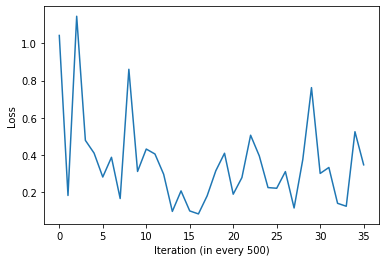

In [14]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

Experiment 2

In [15]:
# Hyperparameters

#Batch Parameters
batch_size = 250
num_iters = 20000
input_dim = 28*28
num_hidden = 400
output_dim = 10

learning_rate = 0.01

num_epochs = num_iters / (len(train_set) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")



'''
MAKING DATASET ITERABLE
'''

train_loader = torch.utils.data.DataLoader(dataset=train_set, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test_set, 
                                          batch_size=batch_size, 
                                          shuffle=False)  

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()

       #First Hidden Layer
        self.linear_1 = nn.Linear(input_size, num_hidden)
        self.relu_1 = nn.ReLU()

        #2nd Hidden Layer
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        self.relu_2 = nn.ReLU()

         #3rd Hidden Layer
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        self.relu_3 = nn.Softmax(dim=0)

         #4th Hidden Layer
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        self.relu_4 = nn.Softmax(dim=0)

         #5th Hidden Layer
        self.linear_5= nn.Linear(num_hidden, num_hidden)
        self.relu_5= nn.Tanh()
        
        #6th Hidden Layer
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        self.relu_6 = nn.Tanh()

        #7th Hidden Layer
        self.linear_7 = nn.Linear(num_hidden, num_hidden)
        self.relu_7 = nn.Tanh()

 
        self.linear_out = nn.Linear(num_hidden, num_classes)
 
    def forward(self, x):
        out  = self.linear_1(x)
        out = self.relu_1(out)
        
        out  = self.linear_2(out)
        out = self.relu_2(out)
 
        out  = self.linear_3(out)
        out = self.relu_3(out)
 
        out  = self.linear_4(out)
        out = self.relu_4(out)
 
        out  = self.linear_5(out)
        out = self.relu_5(out)
 
        out  = self.linear_6(out)
        out = self.relu_6(out)

        out  = self.linear_7(out)
        out = self.relu_7(out)

        
        
        probas  = self.linear_out(out)
        return probas


# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)
# To enable GPU
model.to(device)

# INSTANTIATE LOSS & OPTIMIZER CLASS

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

83
Iteration: 500. Loss: 2.301877498626709. Accuracy: 10.0
Iteration: 1000. Loss: 2.302217960357666. Accuracy: 10.0
Iteration: 1500. Loss: 2.3027429580688477. Accuracy: 10.0
Iteration: 2000. Loss: 2.302638530731201. Accuracy: 10.0
Iteration: 2500. Loss: 2.3027098178863525. Accuracy: 10.0
Iteration: 3000. Loss: 2.3023829460144043. Accuracy: 10.0
Iteration: 3500. Loss: 2.302497148513794. Accuracy: 10.0
Iteration: 4000. Loss: 2.302382230758667. Accuracy: 10.0
Iteration: 4500. Loss: 2.3026280403137207. Accuracy: 10.0
Iteration: 5000. Loss: 2.3027114868164062. Accuracy: 10.0
Iteration: 5500. Loss: 2.3028581142425537. Accuracy: 10.0
Iteration: 6000. Loss: 2.3026366233825684. Accuracy: 10.0
Iteration: 6500. Loss: 2.3026773929595947. Accuracy: 10.0
Iteration: 7000. Loss: 2.302426338195801. Accuracy: 10.0
Iteration: 7500. Loss: 2.3025050163269043. Accuracy: 10.0
Iteration: 8000. Loss: 2.3025832176208496. Accuracy: 10.0
Iteration: 8500. Loss: 2.3026328086853027. Accuracy: 10.0
Iteration: 9000. L

[2.301877498626709, 2.302217960357666, 2.3027429580688477, 2.302638530731201, 2.3027098178863525, 2.3023829460144043, 2.302497148513794, 2.302382230758667, 2.3026280403137207, 2.3027114868164062, 2.3028581142425537, 2.3026366233825684, 2.3026773929595947, 2.302426338195801, 2.3025050163269043, 2.3025832176208496, 2.3026328086853027, 2.302838087081909, 2.3025124073028564, 2.3025834560394287, 2.302846670150757, 2.3024673461914062, 2.3027091026306152, 2.3025765419006348, 2.302628755569458, 2.302811861038208, 2.302797317504883, 2.302581787109375, 2.302790880203247, 2.3027541637420654, 2.3024632930755615, 2.302651882171631, 2.3029232025146484, 2.3027400970458984, 2.3025107383728027, 2.3027281761169434, 2.3026256561279297, 2.3025388717651367, 2.3020200729370117]


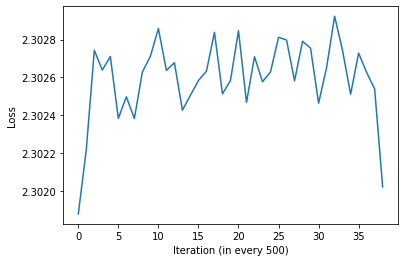

In [16]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()